In [12]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


NameError: name 'df_DA_top_pay_US' is not defined

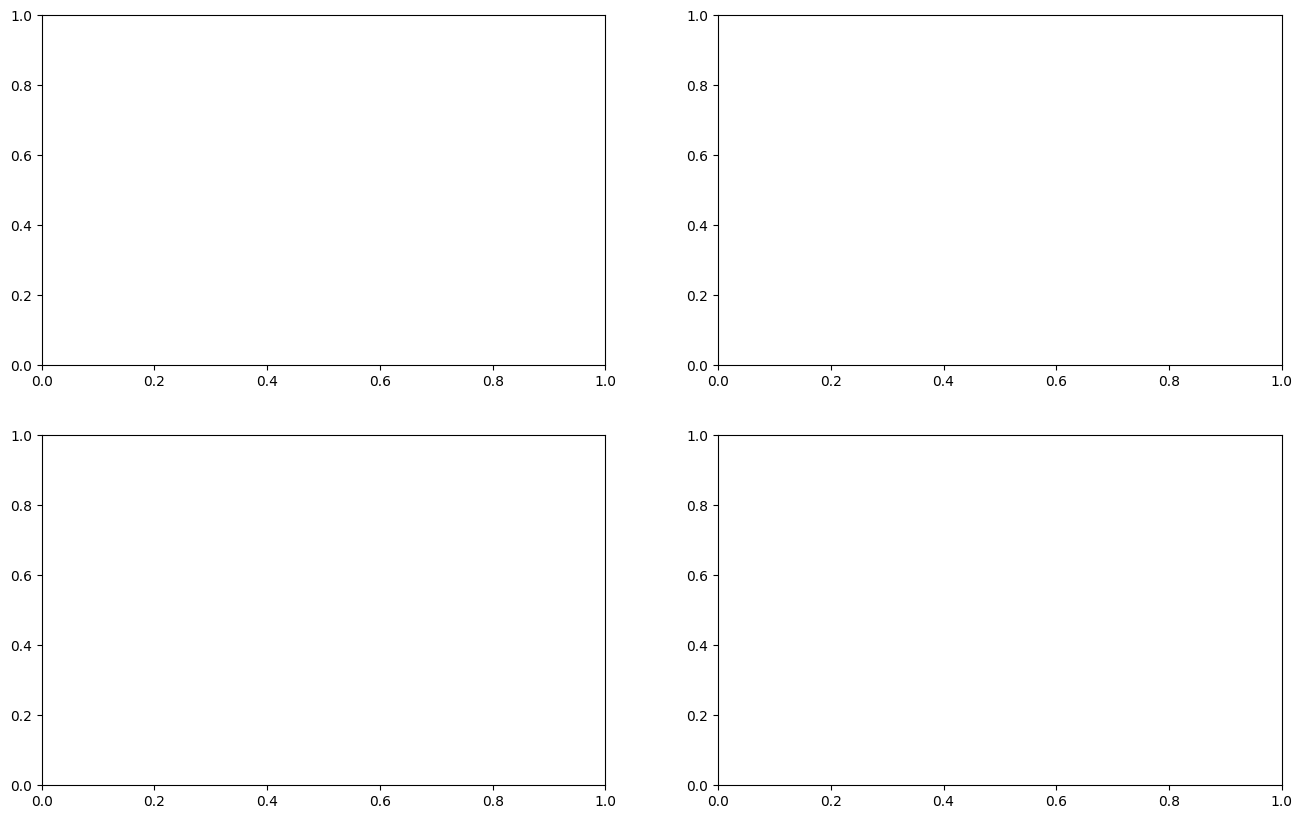

In [15]:


# Create Subplots: Left = USA, Right = Germany
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# USA: Highest Paid Skills (Left-Top)
sns.barplot(
    data=df_DA_top_pay_US,
    x='median',
    y=df_DA_top_pay_US.index,
    palette='Oranges_r',
    ax=axes[0, 0]
)
axes[0, 0].set_title('Highest Paid Skills (USA)')
axes[0, 0].set_xlabel('Median Salary (USD)')
axes[0, 0].set_ylabel('')
axes[0, 0].set_xlim(0, 200000)  # Set limit for x-axis
axes[0, 0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Germany: Highest Paid Skills (Right-Top)
sns.barplot(
    data=df_DA_top_pay_DE,
    x='median',
    y=df_DA_top_pay_DE.index,
    palette='Blues_r',
    ax=axes[0, 1]
)
axes[0, 1].set_title('Highest Paid Skills (Germany)')
axes[0, 1].set_xlabel('Median Salary (EUR)')
axes[0, 1].set_ylabel('')
axes[0, 1].set_xlim(0, 200000)  # Set limit for x-axis
axes[0, 1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'€{int(x/1000)}K'))

# USA: Most In-Demand Skills (Left-Bottom)
sns.barplot(
    data=df_DA_skills_US,
    x='median',
    y=df_DA_skills_US.index,
    palette='Oranges_r',
    ax=axes[1, 0]
)
axes[1, 0].set_title('Most In-Demand Skills (USA)')
axes[1, 0].set_xlabel('Median Salary (USD)')
axes[1, 0].set_ylabel('')
axes[1, 0].set_xlim(0, 200000)  # Set limit for x-axis
axes[1, 0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Germany: Most In-Demand Skills (Right-Bottom)
sns.barplot(
    data=df_DA_skills_DE,
    x='median',
    y=df_DA_skills_DE.index,
    palette='Blues_r',
    ax=axes[1, 1]
)
axes[1, 1].set_title('Most In-Demand Skills (Germany)')
axes[1, 1].set_xlabel('Median Salary (EUR)')
axes[1, 1].set_ylabel('')
axes[1, 1].set_xlim(0, 200000)  # Set limit for x-axis
axes[1, 1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'€{int(x/1000)}K'))

# Adjust Layout
plt.tight_layout()
plt.show()




In [16]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [7]:
# using df_DA find the count of skills and also the median salary for each skill
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_US)  # Find count of Data Analyst jobs in US with salary info

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

df_DA_skills = df_DA_skills[df_DA_skills['skill_count'] > 0]

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
theano,1,100000.0,0.022989
typescript,1,65000.0,0.022989
vmware,1,147500.0,0.022989


In [8]:

skill_limit = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]

In [10]:

from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the US')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

ModuleNotFoundError: No module named 'scipy'